# ggplot2 パッケージによる作図入門

### 重ね書きのイメージ

ggplot2パッケージは重ね書きです. そのイメージを掴むために,
重ね書きのステップに分けてグラフを描いてみましょう.

まずは, 下地を作ります. ggplot()関数で白(グレー)の下地を用意します.

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)


palmerpenguins installed

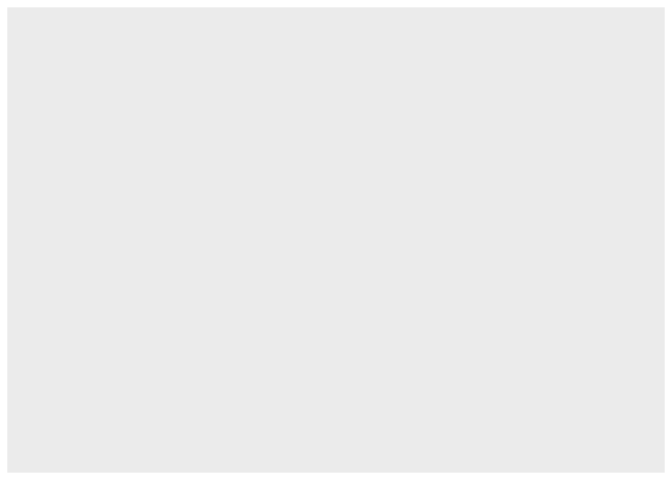

In [ ]:
pacman::p_load(
  ggplot2,
  palmerpenguins
)

次にヒストグラムを作成し, プロットします.
ヒストグラムを追加するには用意した下地とgeom_histogram()を+でつなぎます.
第一引数にプロットするデータを指定します(後で指定も可能).
第二引数のmapping=aes()でどの列をx軸やy軸にプロットするのかを指定します.
なお、dataやmapping,x,yは順番を変えなければ省略可能です.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

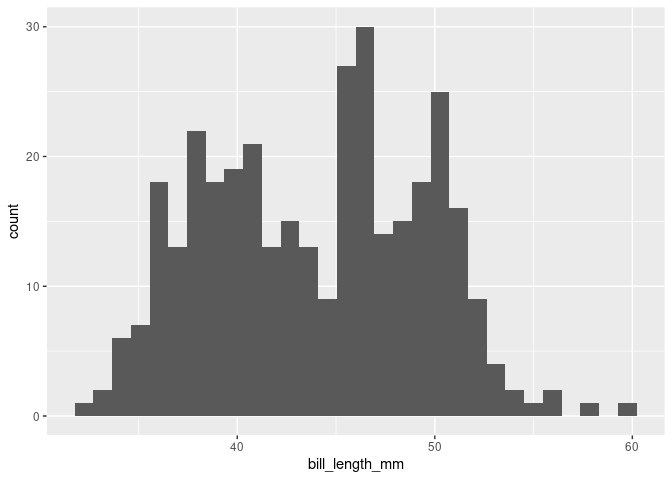

In [ ]:
ggplot() +
  geom_histogram(
    data    = penguins,
    mapping = aes(
      x = bill_length_mm
    )
  )

そして, 6行目と12行目にy = after_stat(density)を追加し,
y軸を密度に変更します. 7行目にfill = “blue”を追加し,
ヒストグラムに色を付けます. また,
ヒストグラムを描画した図にgeom_density()で密度曲線を追加しましょう.

最終行で指定した引数の`alpha`は密度曲線の中の透明度です.
今回は0%を指定して透明にします.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

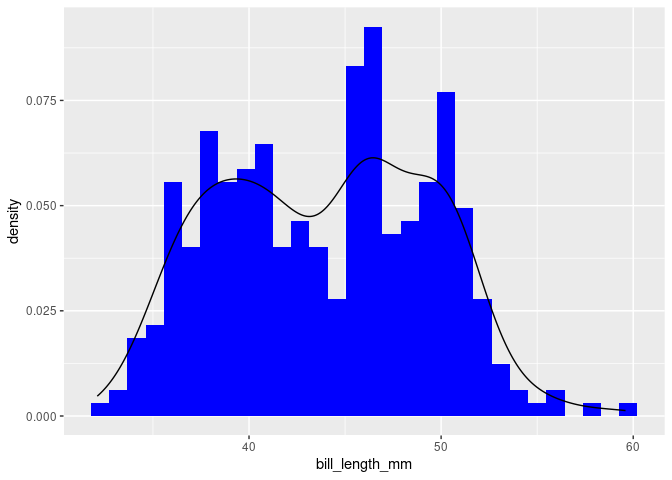

In [ ]:
ggplot() +
  geom_histogram(
    data    = penguins,
    mapping = aes(
      x = bill_length_mm,
      y = after_stat(density)
    ),
    fill    = "blue"
  ) +
  geom_density(
    data    = penguins,
    mapping = aes(
      x = bill_length_mm,
      y = after_stat(density)
    ),
    alpha   = 0
  )

何度も同じデータやx軸等が利用できる場合には,
はじめの`ggplot()`の引数の中でまとめて指定することができます.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

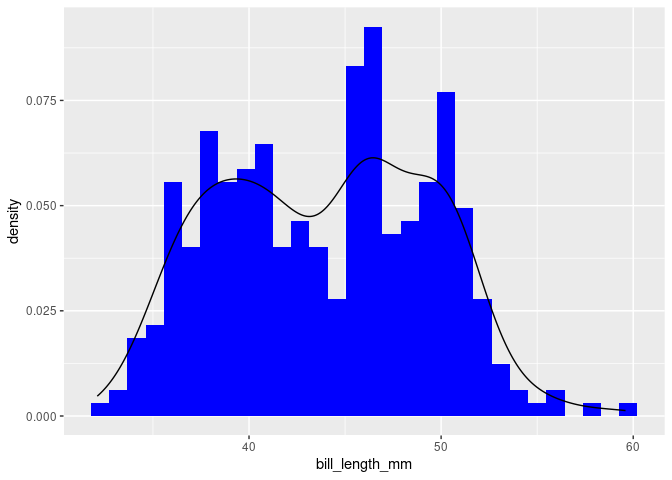

In [ ]:
ggplot(
  data    = penguins,
  mapping = aes(
    x = bill_length_mm,
    y = after_stat(density)
  )
) +
  geom_histogram(fill = "blue") +
  geom_density(alpha = 0)

さらに軸などを指定する`aes()`は外に出すこともできます

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

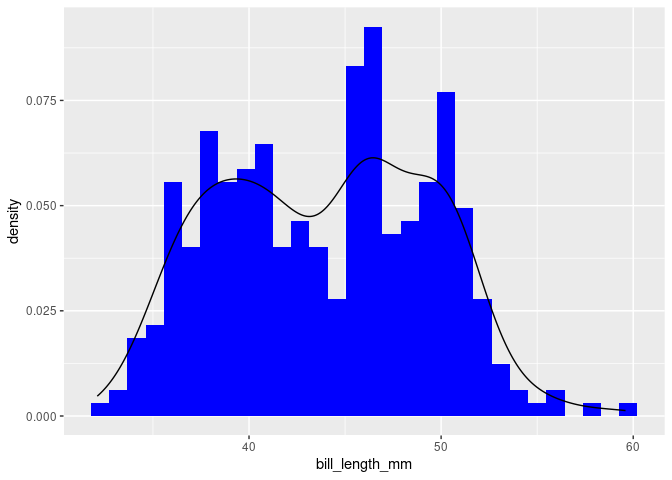

In [ ]:
ggplot(data = penguins) +
  aes(
    x = bill_length_mm,
    y = after_stat(density)
  ) +
  geom_histogram(fill = "blue") +
  geom_density(alpha = 0)

論文に載せやすいように背景は白くしましょう. theme_classic()で背景を白く,
重要でない線はなくすなど行います.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

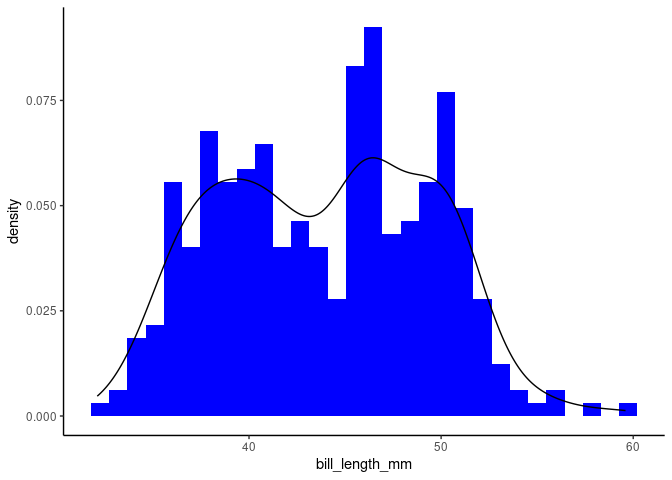

In [ ]:
ggplot(data = penguins) +
  aes(
    x = bill_length_mm,
    y = after_stat(density)
  ) +
  geom_histogram(fill = "blue") +
  geom_density(alpha = 0) +
  theme_classic()

最後にタイトルをつけます. タイトルはggtitle()で指定できます.
タイトルの文字列はダブルクオーテーション(“)で囲みます.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

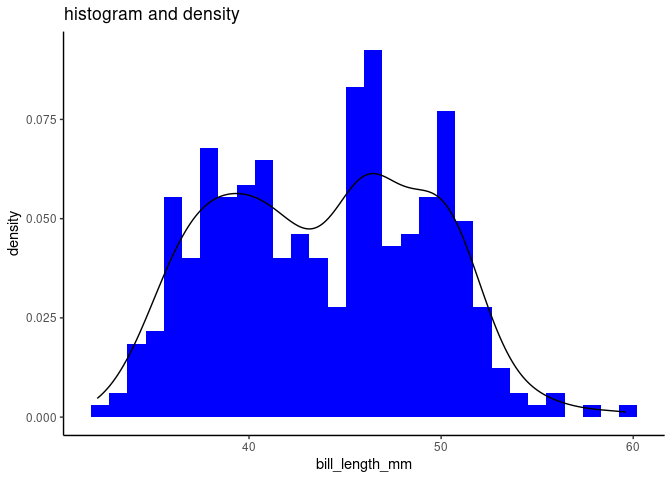

In [ ]:
ggplot(data = penguins) +
  aes(
    x = bill_length_mm,
    y = after_stat(density)
  ) +
  geom_histogram(fill = "blue") +
  geom_density(alpha = 0) +
  theme_classic() +
  ggtitle("histogram and density")

### 1枚のグラフにカテゴリーごとのヒストグラムを描く

1枚のグラフにカテゴリーごとのヒストグラムを描いてみましょう. aes(fill=
Category)とすることでカテゴリーごとに色分けができます. また,
geom_histogram(position =
“identity”)とすると1つの図の中でカテゴリーごとにヒストグラムが描けます.
`alpha = 0.5`と書くことでヒストグラムを半透明にして見やすくしています.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

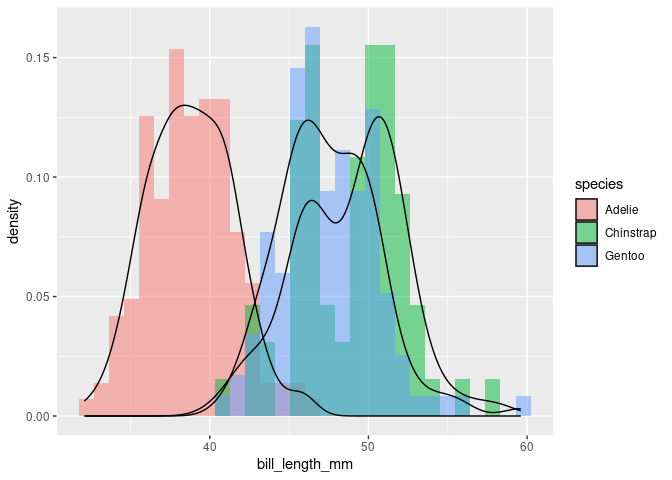

In [ ]:
ggplot(data = penguins) +
  aes(
    x    = bill_length_mm,
    y    = after_stat(density),
    fill = species
  ) +
  geom_histogram(
    position = "identity",
    alpha    = 0.5
  ) +
  geom_density(alpha = 0)

### 別々のグラフにカテゴリーごとのグラフを描く

別々のグラフにカテゴリーごとのグラフを描いてみましょう.
facet_wrap(~Category)とすることで,
別々の図にカテゴリーごとのヒストグラムを描けます. scales =
“free”でx軸やy軸をそれぞれのカテゴリーに最適化します.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

(`stat_density()`).

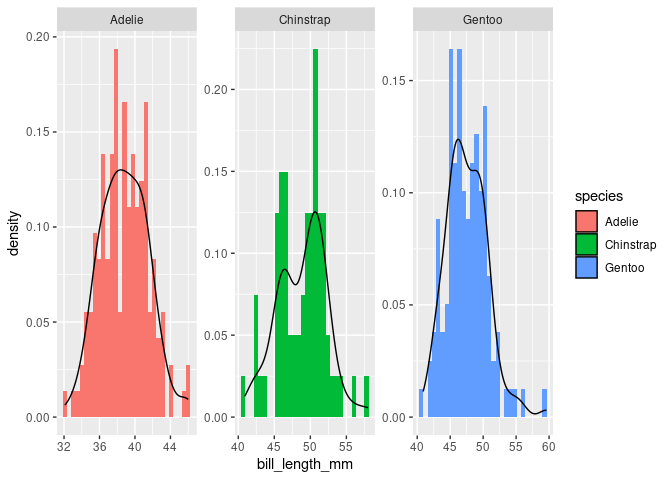

In [ ]:
ggplot(data = penguins) +
  aes(
    x    = bill_length_mm,
    y    = after_stat(density),
    fill = species
  ) +
  geom_histogram() +
  geom_density(alpha = 0) +
  facet_wrap(
    ~species,
    scales = "free"
  )

ggplot2を利用した作図方法の概要は以上です.